# KMeans Clustering with KMeans++

In [28]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from matplotlib import cm

In [2]:
# Generating blobs for clustering
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

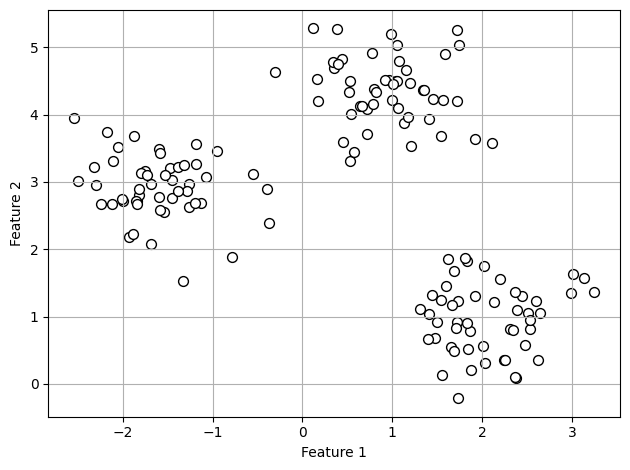

In [5]:
# Plotting the blobs
plt.scatter(X[:, 0],X[:, 1], c="white", marker='o', edgecolor='black', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

K-Means Algorithm:
1. Randomly pick k centroids from the examples as initial cluster centers
2. Assign each example to the nearest centroid, $ 𝜇^{(𝑗)}, 𝑗 \in \{1, … , 𝑘\}$
3. Move the centroids to the center of the examples that were assigned to it
4. Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance
or maximum number of iterations is reached

In [7]:
# Implementing KMeans
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

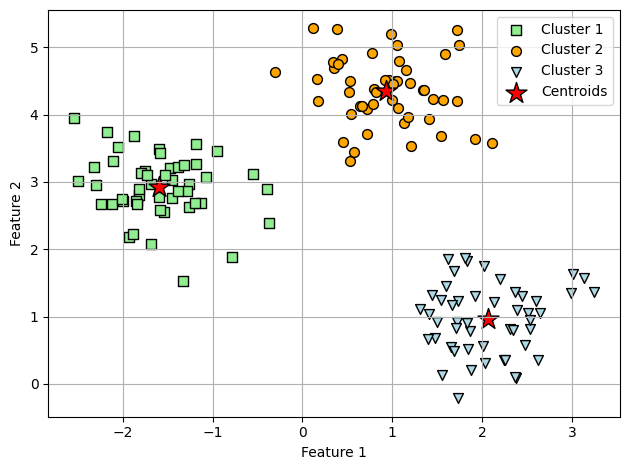

In [8]:
# visualize the clusters
plt.scatter(X[y_km == 0,0],
            X[y_km ==0,1],
            s = 50, c='lightgreen',
            marker='s', edgecolor='black', label='Cluster 1')

plt.scatter(X[y_km == 1,0],
            X[y_km ==1,1],
            s = 50, c='orange',
            marker='o', edgecolor='black', label='Cluster 2')

plt.scatter(X[y_km == 2,0],
            X[y_km ==2,1],
            s = 50, c='lightblue',
            marker='v', edgecolor='black', label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:,1],
            s=250, marker='*',
            c='red', edgecolor='black', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

## KMEANS++

![KMeans++](/Users/subashpandey/Desktop/ML-DL-From-Scratch/images/KMeans++.png "KMeans++")

## Elbow method to find the optimal number of clusters

Based on the within-cluster SSE, we can use a graphical tool, the so-called elbow method, to estimate
the optimal number of clusters, k, for a given task. We can say that if k increases, the distortion will
decrease. This is because the examples will be closer to the centroids they are assigned to. The idea
behind the elbow method is to identify the value of k where the distortion begins to increase most
rapidly

In [9]:
# within-cluster SSE of a KMeans model
print(f"Distortion: {km.inertia_:.2f}")

Distortion: 72.48


In [10]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

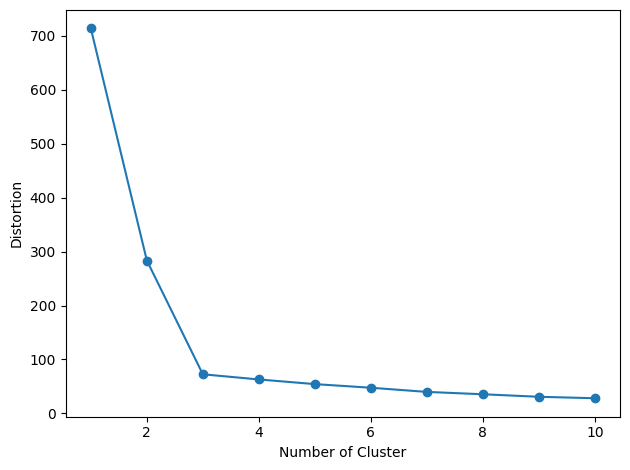

In [11]:
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

**Elbow is at k=3.**

## Quantifying the quality of clustering via silhouette plots

![Silhouette](/Users/subashpandey/Desktop/ML-DL-From-Scratch/images/silhouette_plot.png "Silhouette Plot")

The silhouette coefficient is bounded in the range –1 to 1. 

In [30]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300,tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

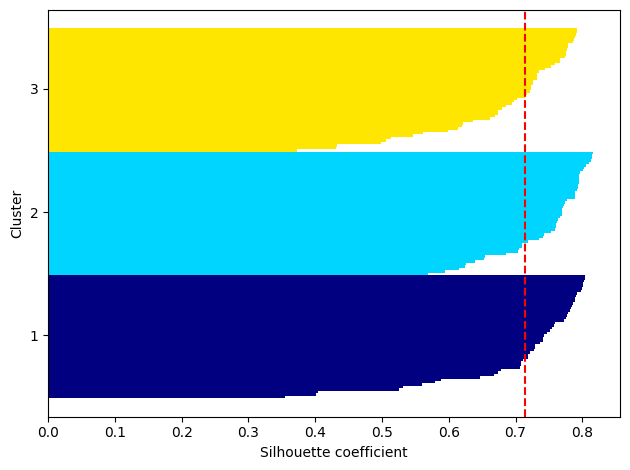

In [31]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0,0
y_ticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color= color)
    y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red',linestyle='--')
plt.yticks(y_ticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

However, as you can see in the preceding silhouette plot, the silhouette coefficients are not close to 0
and are approximately equally far away from the average silhouette score, which is, in this case, an
indicator of good clustering. Furthermore, to summarize the goodness of our clustering, we added
the average silhouette coefficient to the plot (dotted line).